In [1]:
# Importing libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Paired')

import os
from os.path import join

path = "../input/stack-overflow-2018-developer-survey/"

# Reading the data

In [3]:
df = pd.read_csv(join(path, 'survey_results_public.csv'), low_memory=False)

In [4]:
df.shape

(98855, 129)

In [5]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [6]:
pd.options.display.max_colwidth = 400
schema = pd.read_csv(join(path, 'survey_results_schema.csv'), low_memory=False)

# Helper functions

In [7]:
def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
    column_count = df[column].value_counts()[:limit]
    
    fig = plt.figure(figsize=(14, 8))
    sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
    sns.despine(left=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=xtick_rotation)

def plot_heatmap(df, variable):
    l = []
    for name, group in top10_df.groupby('Country'):
        dff = pd.DataFrame(group[variable].value_counts() / group[variable].count()) 
        dff['Country'] = name
        dff['rate'] = dff.index
        l.append(dff)
    fig = plt.figure(figsize=(14, 8))
    df_2 = pd.concat(l)
    dff = df_2.pivot_table(index='Country', columns='rate')
    sns.heatmap(dff, cmap="YlGnBu", linewidths=.3)

# Top 10 Countries that responded to the survey

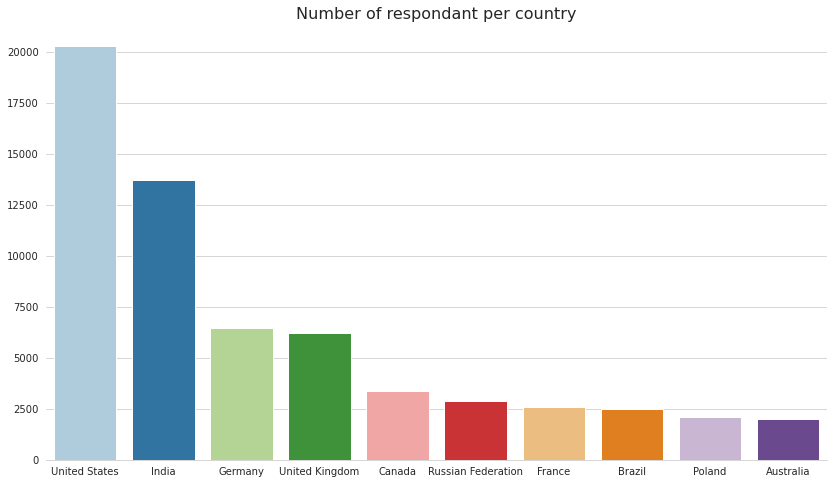

In [8]:
plot_categorical_count(df, column='Country', title='Number of respondant per country', limit=10)

Conclusion: We can see that the USA is the country with the most respondants.

# Hobbyist programmer Distribution

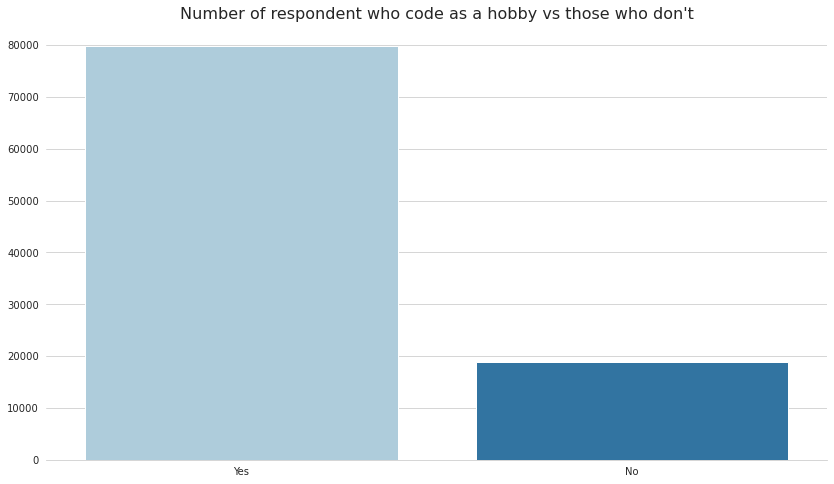

In [9]:
plot_categorical_count(df, 'Hobby', title='Number of respondent who code as a hobby vs those who don\'t')

Conclusion: Majority of the respondants code as a hobby.

# Open Source Contributor Distribution

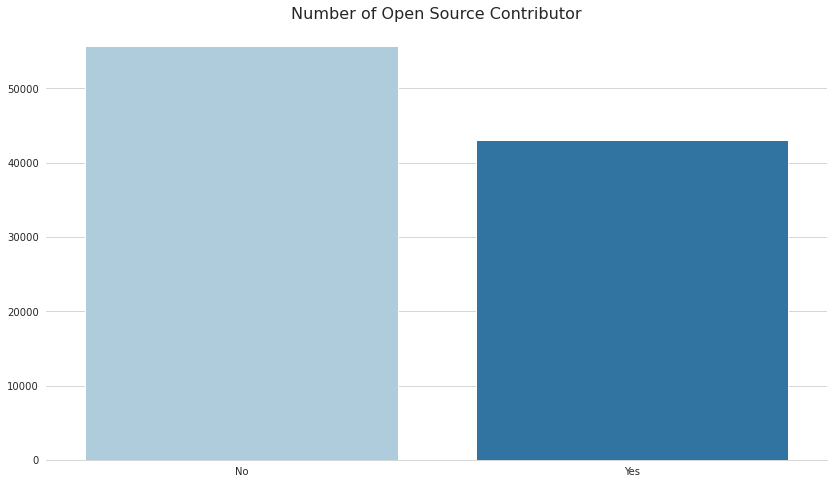

In [10]:
plot_categorical_count(df, 'OpenSource', title='Number of Open Source Contributor')


Conclusion: The number of respondants who dpn't contribute to Open Source is higher than those who don't.

# Coding as a Hobby vs Contributing to Open Source

Text(0.5, 1.0, 'Number of Open Source Contributour')

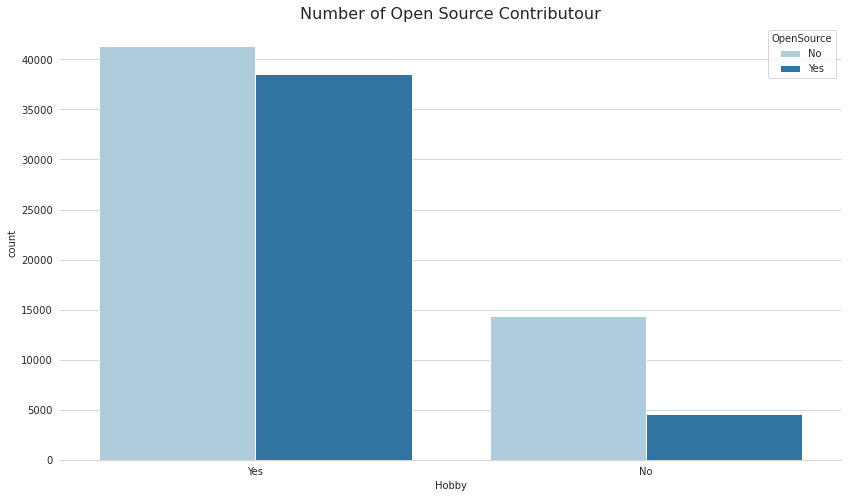

In [11]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.countplot(df['Hobby'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)

Conclusion: Thse who code as a hobby are more likely to contribute to Open Source.

# Student Distribution

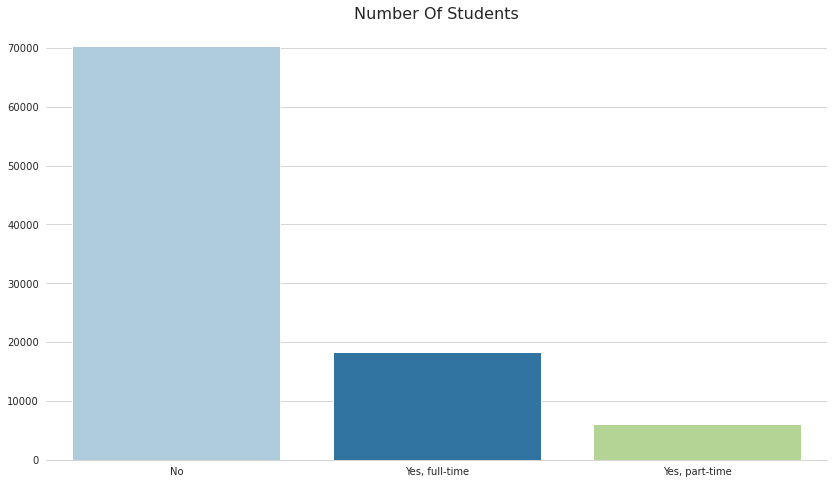

In [12]:
plot_categorical_count(df, 'Student', title='Number Of Students', limit=3)

Conclusion: Majority of respondants were not students.

# Employement Status

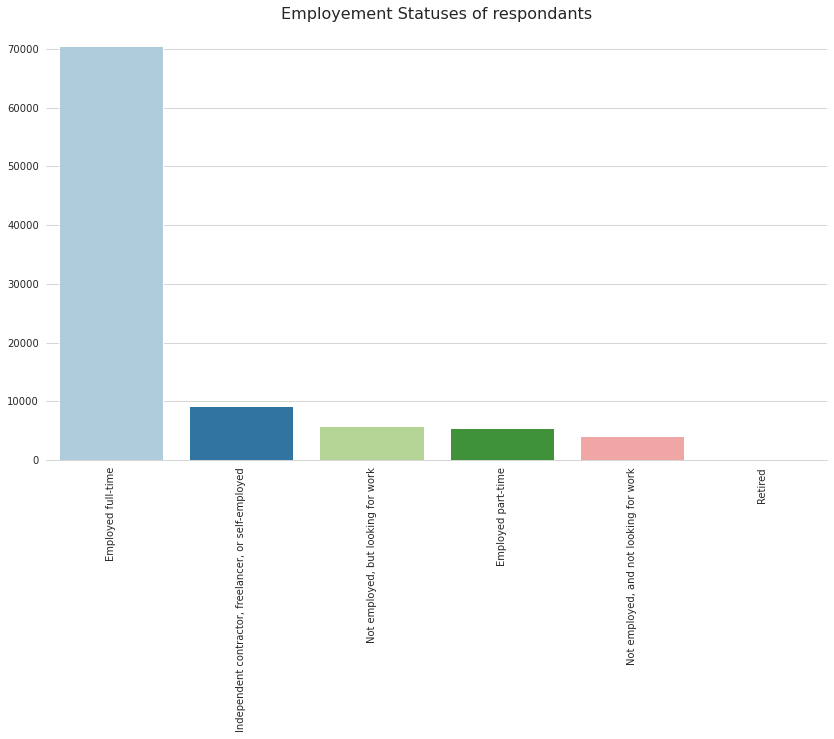

In [13]:
plot_categorical_count(df, 'Employment', title='Employement Statuses of respondants', limit=6, xtick_rotation='vertical')

Conclusion: Majority of the respondants are working full time.

# Gender Distribution

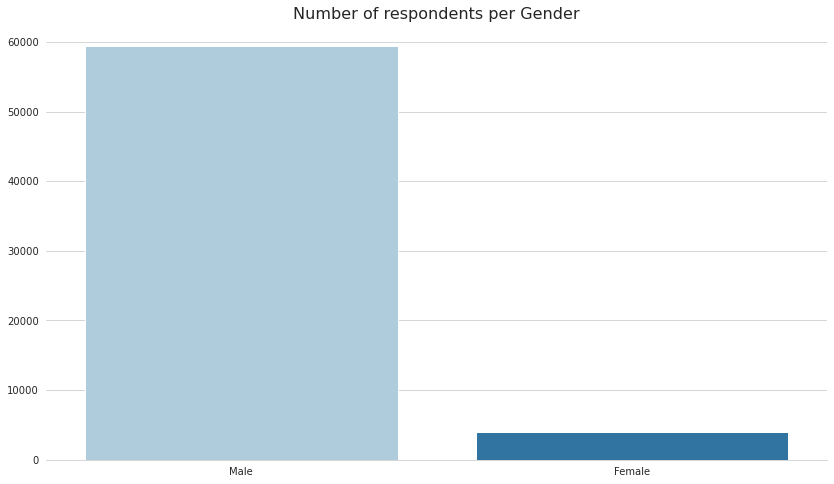

In [14]:
plot_categorical_count(df, 'Gender', title='Number of respondents per Gender')

Conclusion: We see that the majority of respondents were male.

# Respondent's Majors

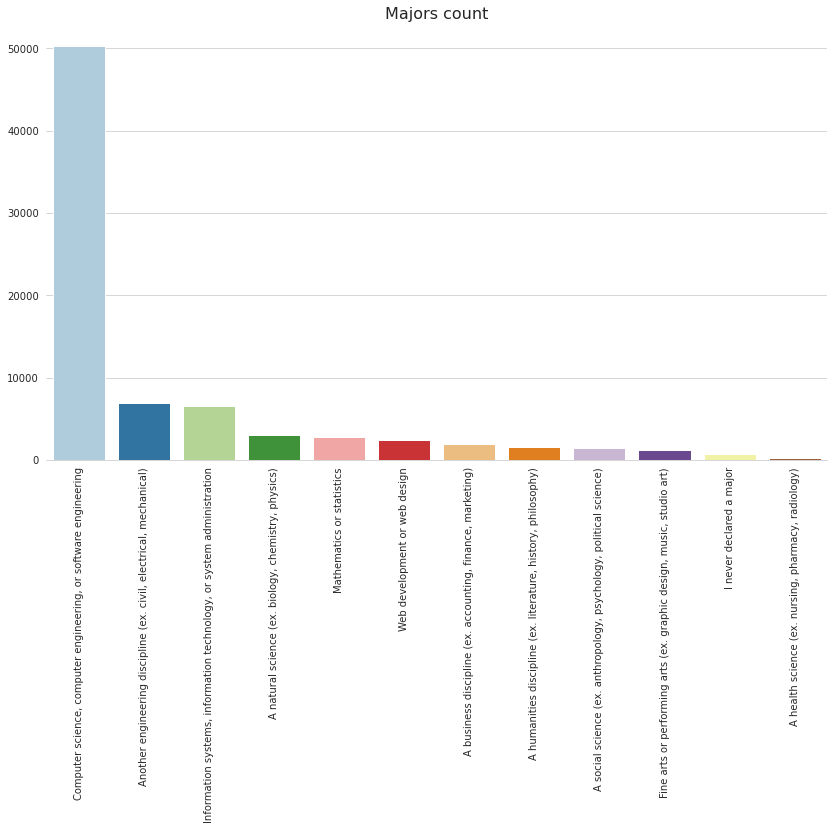

In [15]:
plot_categorical_count(df, 'UndergradMajor', 'Majors count', limit=100, xtick_rotation='vertical')

Conclusion: As expected, the computer-related majors are greatest in count in the Stack overflow community.

# Job Satisfaction in Top 10 countries

In [16]:
top_10_list = list(df['Country'].value_counts()[:10].index)
def st_not(row):
    if 'dissatisfied' in row:
        return 'Dissatisfied'
    return 'Satisfied'

df['sat_or_not'] = df['JobSatisfaction'].dropna().map(st_not)
top10_df = df.where(df['Country'].isin(top_10_list))
sat_count = pd.DataFrame()
names = []
sat = []
disat = []
for name, group in top10_df.groupby('Country'):
    names.append(name)
    country_count = group['sat_or_not'].value_counts()
    sat.append(country_count['Satisfied'])
sat_count['Country'] = names
sat_count

,Country
0,Australia
1,Brazil
2,Canada
3,France
4,Germany
5,India
6,Poland
7,Russian Federation
8,United Kingdom
9,United States


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

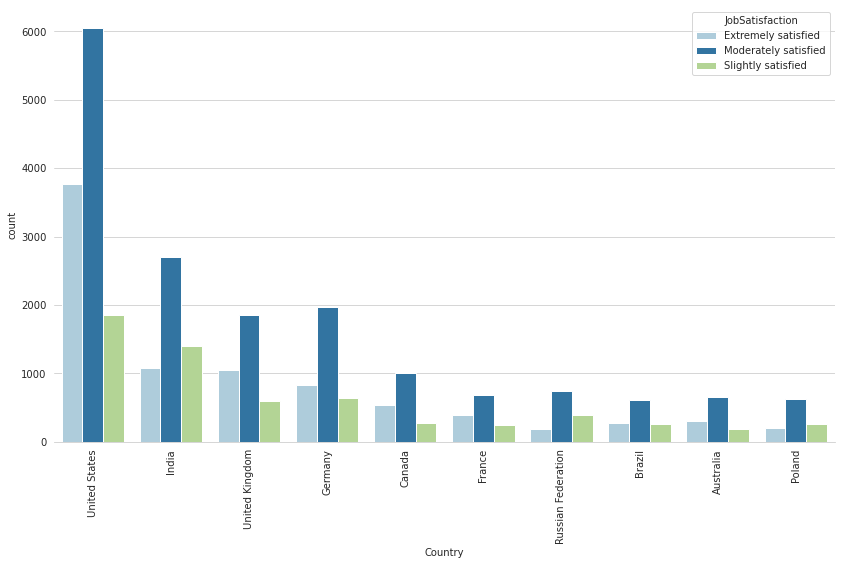

In [17]:
df['JobSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

Conclusion: In the Top 10 countires, developers are moderatly satisfied with their jobs.

# Career Satisfaction

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

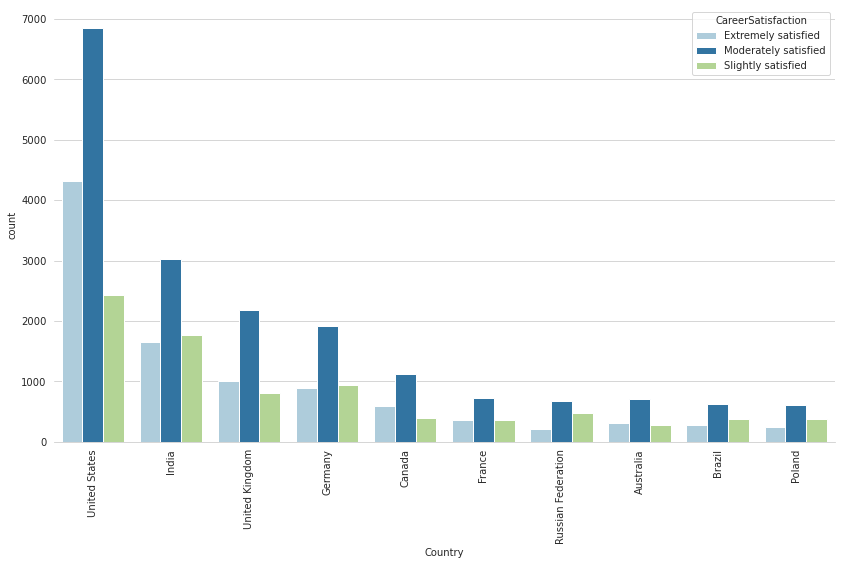

In [18]:
df['CareerSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['CareerSatisfaction'] == 'Moderately satisfied', df['CareerSatisfaction'] == 'Extremely satisfied'), df['CareerSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='CareerSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

Conclusion: In the Top 10 countires, developers are moderatly satisfied with their careers.

# Salary Distribution

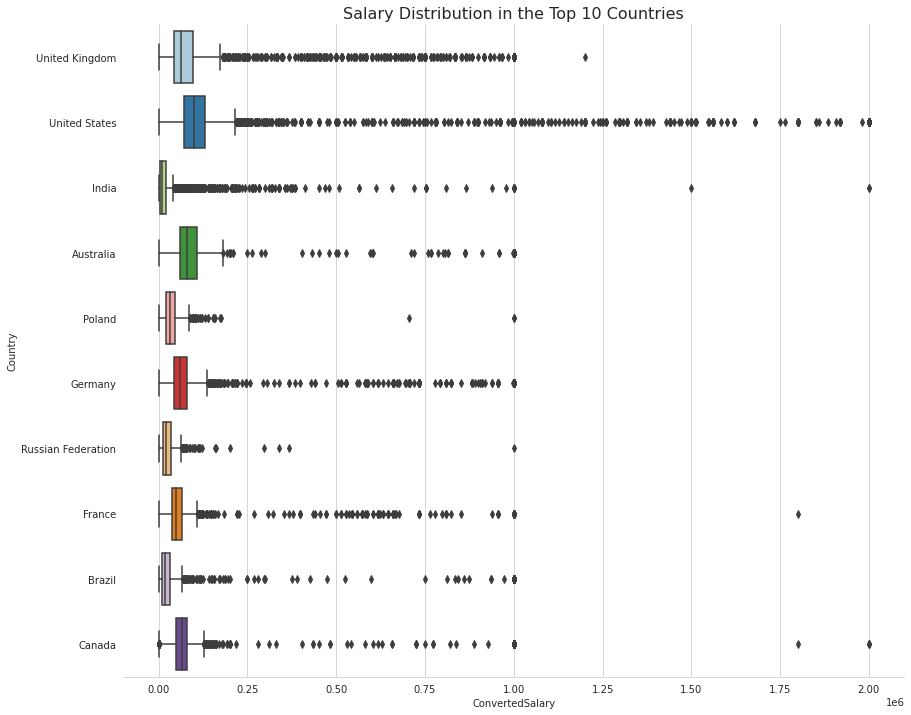

In [19]:
plt.figure(figsize=(14, 12))
df_top10 = df.where(df['Country'].isin(top_10_list))

sns.boxplot(data=df_top10, x='ConvertedSalary', y='Country', palette='Paired')
plt.title('Salary Distribution in the Top 10 Countries', fontsize=16)
sns.despine(left=True)

Conclusion: We see that USA developers are the most paid, while Indian developers are the worst.

# Productivity time

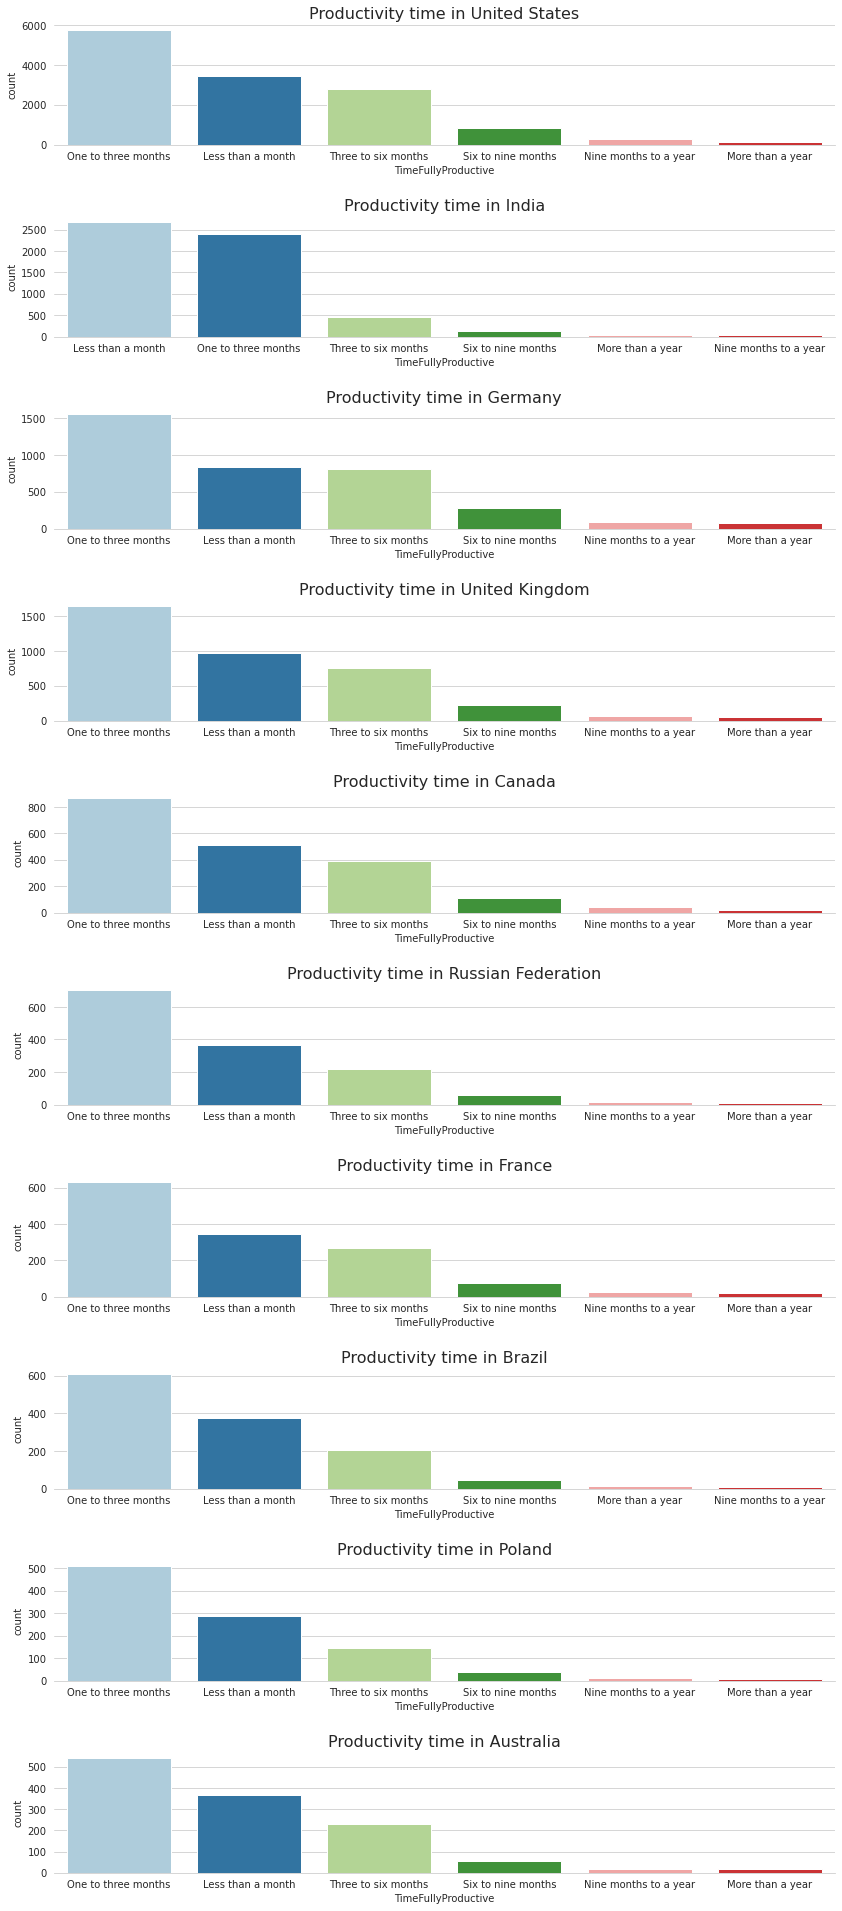

In [20]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='TimeFullyProductive', palette='Paired', ax=ax, order=data['TimeFullyProductive'].value_counts().index)
    ax.set_title('Productivity time in {}'.format(country), fontsize=16)
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

Conclusion: We see that most of the developers in any country are most productive during the one to three month period.

# Years Coding Professionally

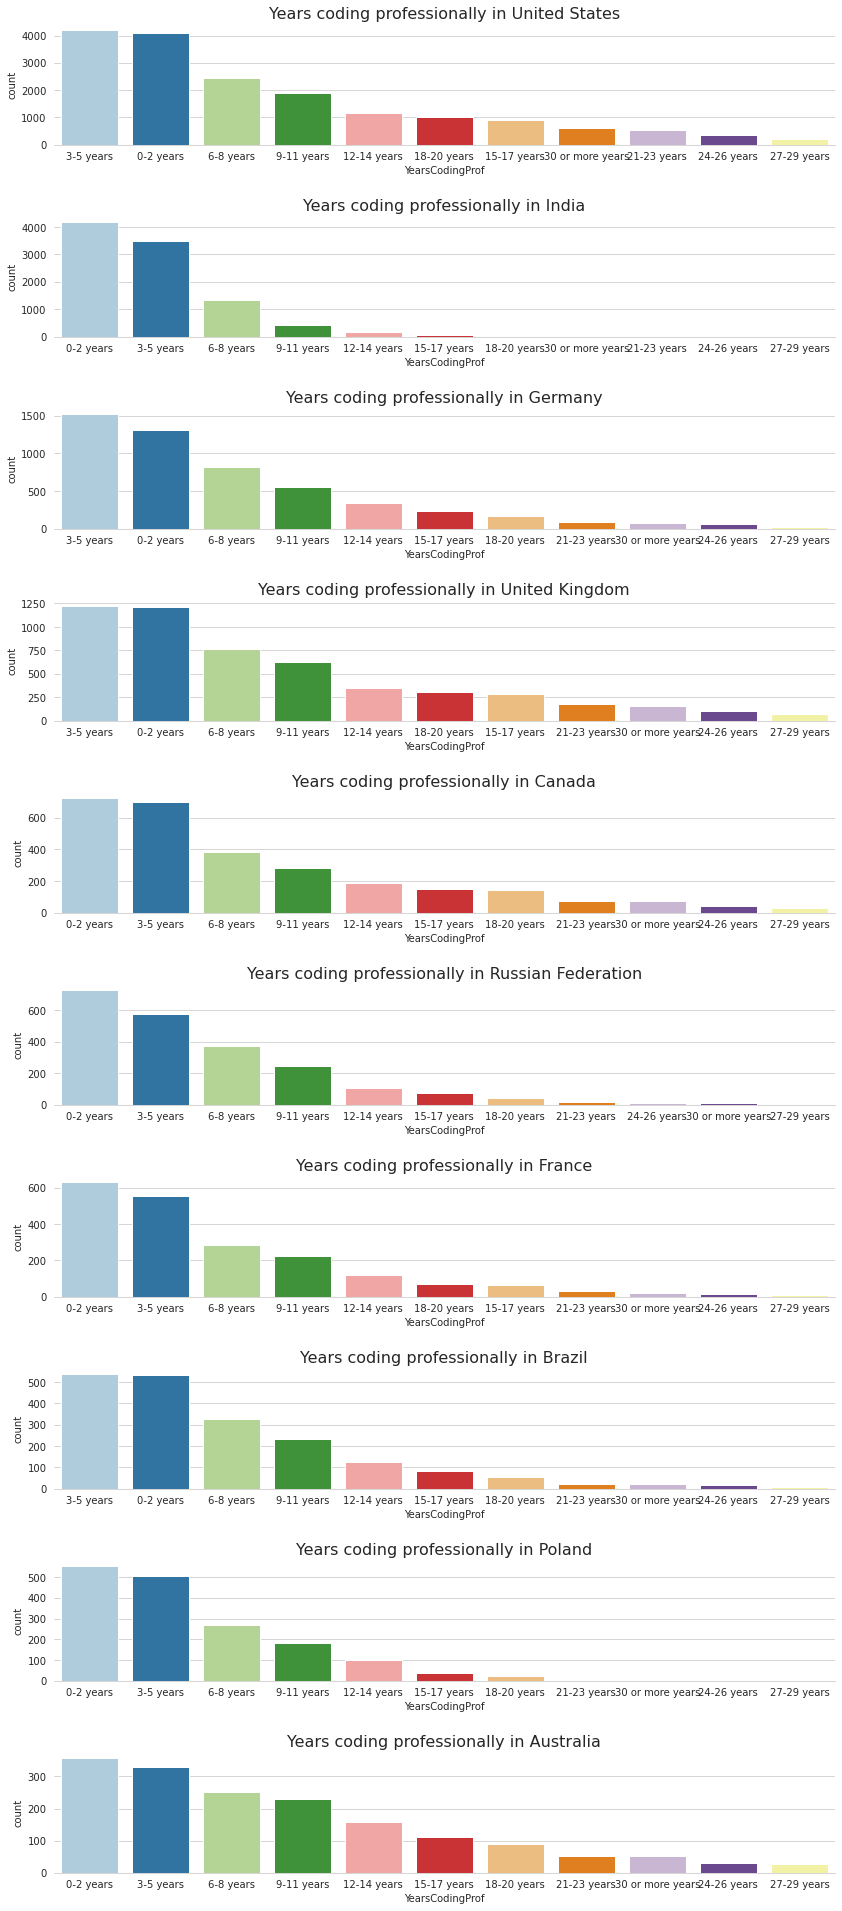

In [21]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='YearsCodingProf', palette='Paired', ax=ax, order=data['YearsCodingProf'].value_counts().index)
    ax.set_title('Years coding professionally in {}'.format(country), fontsize=16)
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

Conclusion: We see that 50% of the developers are budding, ie, they have 0-3 years of experience.

# Hours spent on the Computer

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

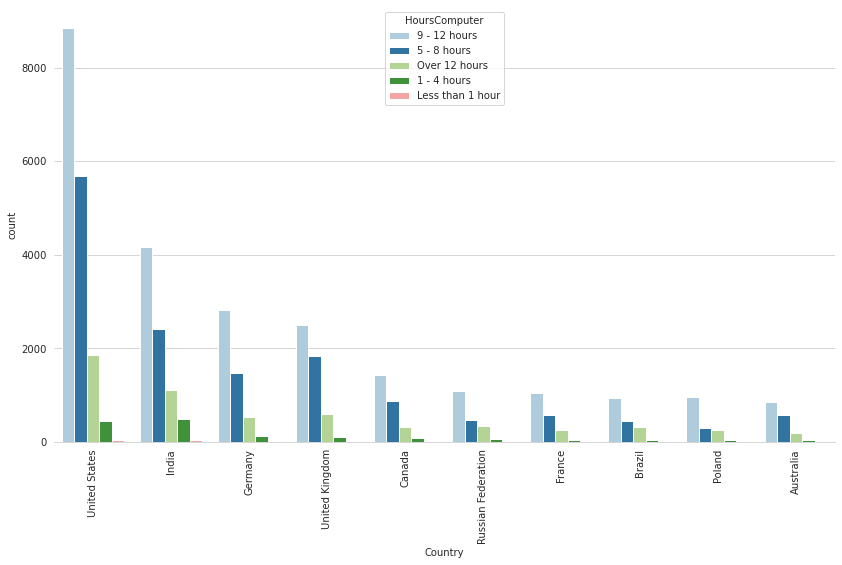

In [22]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursComputer', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

Conclusion: Most developers spent between 6 and 12 hours on the computer.

# Hours spent outside

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

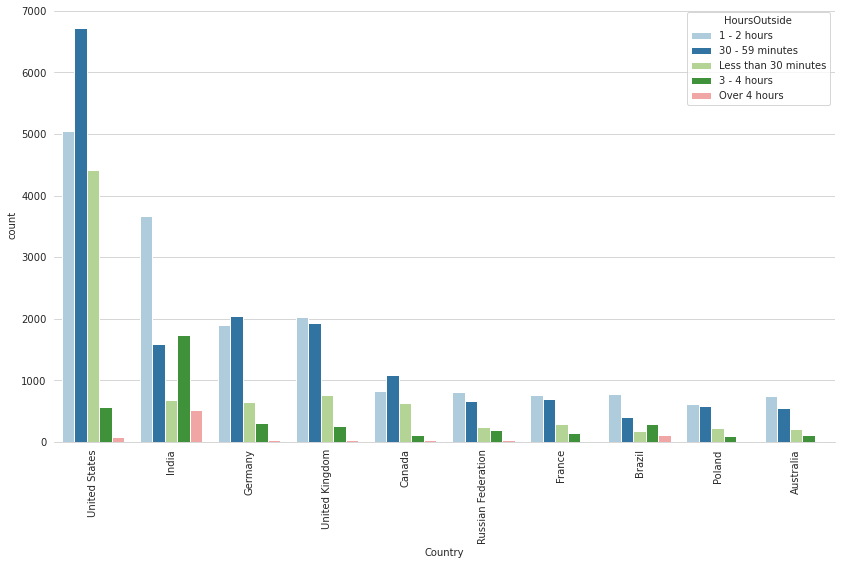

In [23]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursOutside', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

Conclusion: India is the only country with average time outside greater than any other country with around 1.5 hours.

# Skipping The Meals

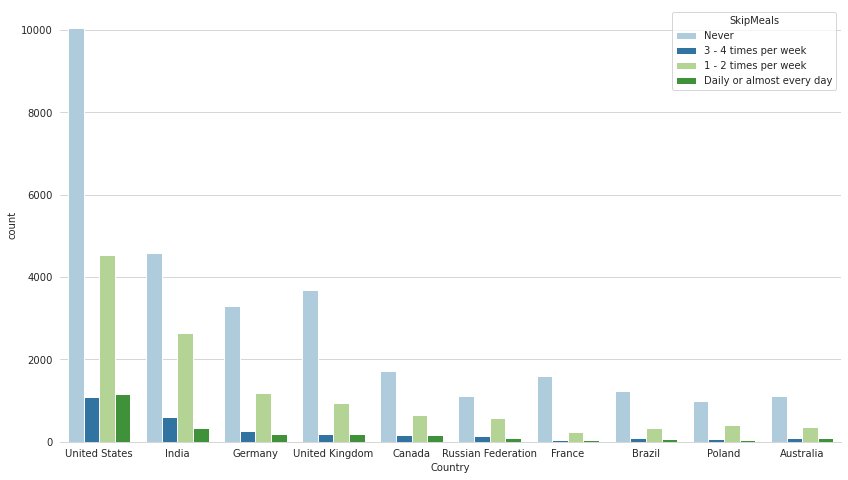

In [24]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Country', hue='SkipMeals', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

Conclusion: We can see the same pattern for the top 10 countries, in which the majority of developers never skip any meals.

# Exercising

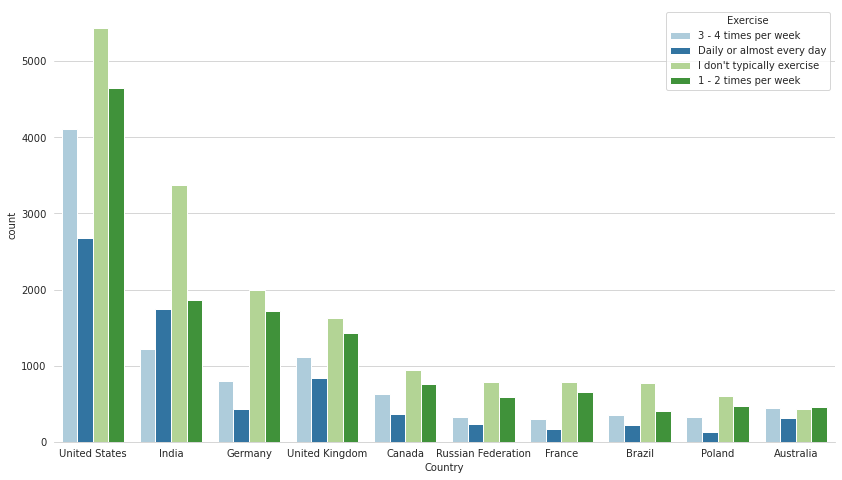

In [25]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Exercise', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

Conclusion: Developers do not typically exercice, or are excercicing for 1-2 times a week which is insufficient.